## 부스팅 (회귀)
- 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법
- 붓스트랩을 병렬로 수행(각 모델을 독립적으로 구축)하는 배깅과 달리 순차방식으로 학습을 진행함

<img src='https://github.com/mjaemin/ADP/blob/main/class101/boosting.png?raw=true' width=600/>

- 훈련 단계에서 알고리즘은 각 결과 모델에 가중치를 할당하므로 분류 결과가 좋은 데이터는 높은 가중치를, 분류 결과가 좋지 않은 데이터는 낮은 가중치를 할당받아 다음 붓스트래핑에서 추출될 확률이 높아짐 

- 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있음
- train 데이터에 과적합할 위험이 있음

<br>

<b>분류의 경우</b>
> sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate=1.0)

<b>회귀의 경우</b>
> sklearn.ensemble.AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate=1.0)

base_estimator : 부스팅에서 수행할 분류기 (None이면 DecisionTreeClassifier/DecisionTreeRegressor를 수행)<br>
n_estimators : 부스팅이 종료되는 최대 분류기의 수 (int, default=50)

In [1]:
import pandas as pd 
df = pd.read_csv('./data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [2]:
from sklearn.ensemble import AdaBoostRegressor # Ada 부스팅

reg = AdaBoostRegressor()

reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [3]:
reg.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [4]:
print("train정확도 : ", reg.score(X_train, y_train))
print("test 정확도 : ", reg.score(X_test, y_test))

train정확도 :  0.2787937883799335
test 정확도 :  0.2390891829497953


In [5]:
import numpy as np 
np.arange(0.01, 0.1, 0.02)

array([0.01, 0.03, 0.05, 0.07, 0.09])

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':np.arange(0.01, 0.1, 0.02)}
model_grid_boost = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
model_grid_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09])})

In [7]:
model_grid_boost.best_estimator_

AdaBoostRegressor(learning_rate=0.08999999999999998)

In [8]:
model_grid_boost.best_estimator_.score(X_train,y_train)

0.6423840546678392

In [9]:
model_grid_boost.best_estimator_.score(X_test,y_test)

0.6192557145071851

In [11]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_boost.best_estimator_.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances


,col_name,feature_importance
0,sqft_living,0.578127
1,grade,0.313686
2,yr_built,0.031587
3,view,0.020352
4,waterfront_standard,0.012914
5,sqft_lot15,0.008839
6,waterfront_river_view,0.008426
7,sqft_lot,0.007992
8,sqft_living15,0.004665
9,sqft_above,0.003759


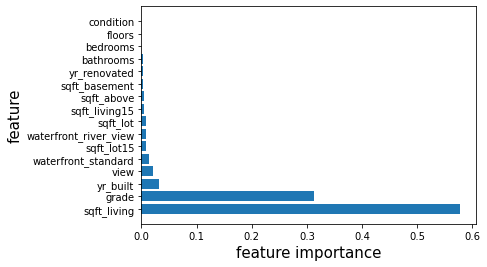

In [12]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()